# Black Friday Prediction


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import warnings
warnings.filterwarnings('ignore')

## **1. Import**


### 1.1 Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.model_selection import train_test_split
 
import math

In [5]:
import matplotlib.style as style
style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

### 1.2 Import data


In [6]:
folder_path = '/content/drive/MyDrive/Project_PML/BlackFridayPrediction/'
folder_path = ''
train_df = pd.read_csv(folder_path + 'train.csv')
test_df = pd.read_csv(folder_path + 'test.csv')
train_df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
train_df.rename(columns={"Stay_In_Current_City_Years":"Years_in_city"}, inplace= True)
test_df.rename(columns={"Stay_In_Current_City_Years":"Years_in_city"}, inplace = True)
train_df.head(6)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227


##  **2. Preprocessing & Visualization**



### 2.1 Processing duplicates

In [8]:
duplicated = train_df[train_df.duplicated()]
print("number of duplicated:", duplicated.shape[0])

number of duplicated: 0


In [9]:
user_df = train_df[["User_ID", "Gender", "Age", "Occupation", "City_Category", "Years_in_city", "Marital_Status"]]
user_duplicated = user_df[user_df.duplicated()]
print("number of duplicated user:", user_duplicated.shape[0])
user_df = user_df.drop_duplicates()
print("number of duplicated user:", user_df[user_df.duplicated()].shape[0])

number of duplicated user: 544177
number of duplicated user: 0


In [10]:
purchased = train_df[["User_ID", "Purchase"]]
purchased = purchased.groupby("User_ID", as_index = False).agg({'Purchase': 'sum'})
user_df = pd.merge(user_df, purchased, on='User_ID')
print('Total amount of money spent by each user:')
print(purchased.head())

Total amount of money spent by each user:
   User_ID  Purchase
0  1000001    334093
1  1000002    810472
2  1000003    341635
3  1000004    206468
4  1000005    821001


In [11]:
user_df.rename(columns={'Purchase': 'Total_Purchase'}, inplace=True)
user_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Total_Purchase
0,1000001,F,0-17,10,A,2,0,334093
1,1000002,M,55+,16,C,4+,0,810472
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,206468
4,1000005,M,26-35,20,A,1,1,821001


### 2.2 User Attributes Analysis

#### Relationship between Gender - Purchase amount  

In [12]:
print("number of female users:", len(user_df[user_df.Gender == "M"]))
print("number of male users:", len(user_df[user_df.Gender == "F"]))

number of female users: 4225
number of male users: 1666


In [13]:
# plt.figure(figsize=(10,6))
# ax = sns.countplot(x="Gender", data= user_df, palette="deep")
# plt.ylabel("")
# ax.set(xlabel = None, title = "Customer genders count")
# plt.show()

In [14]:
gender_purchased = user_df[["Gender", "Total_Purchase"]]
gender_purchased = gender_purchased.groupby("Gender", as_index = False).agg({'Total_Purchase': 'sum'})
gender_purchased.head()

,Gender,Total_Purchase
0,F,1186232642
1,M,3909580100


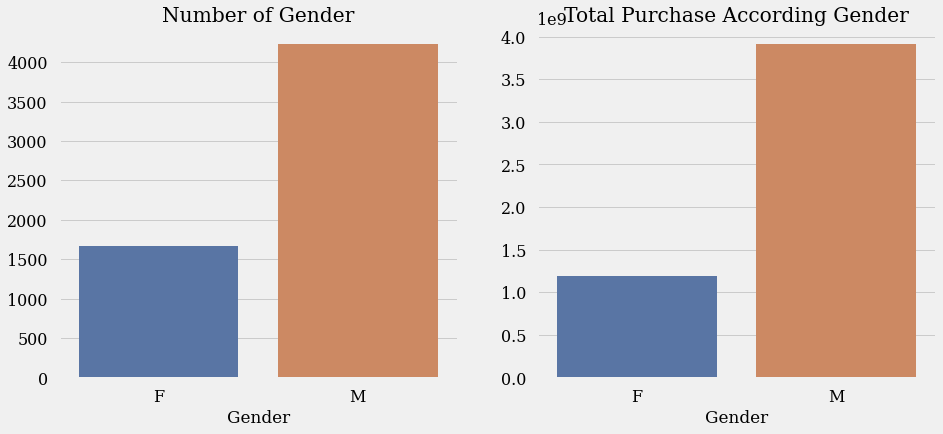

In [15]:
fig, ax = plt.subplots(1,2, figsize = (14,6))
sns.countplot(ax = ax[0], x= 'Gender', data= user_df, palette="deep")
sns.barplot(ax= ax[1], x = "Gender", y="Total_Purchase", data= gender_purchased, ci=None, palette="deep")
ax[0].set(title="Number of Gender", ylabel = None)
ax[1].set(title="Total Purchase According Gender", ylabel = None)
plt.show()

#### Relationship between City Category - Purchase amount 

In [16]:
city_purchase = user_df[["City_Category", "Total_Purchase"]]
city_purchase = city_purchase.groupby("City_Category", as_index = False).agg({'Total_Purchase': 'sum'})
print(city_purchase)

  City_Category  Total_Purchase
0             A      1316471661
1             B      2115533605
2             C      1663807476


In [17]:
city_purchase["Number Citizen"] = 0
for city in user_df.City_Category.unique():
    city_purchase.loc[city_purchase.City_Category == city, "Number Citizen"] = len(user_df[user_df.City_Category == city])
city_purchase["Ratio Purchase/Person"] = round(city_purchase.Total_Purchase / city_purchase["Number Citizen"], 3)
print(city_purchase)

  City_Category  Total_Purchase  Number Citizen  Ratio Purchase/Person
0             A      1316471661            1045            1259781.494
1             B      2115533605            1707            1239328.415
2             C      1663807476            3139             530043.796


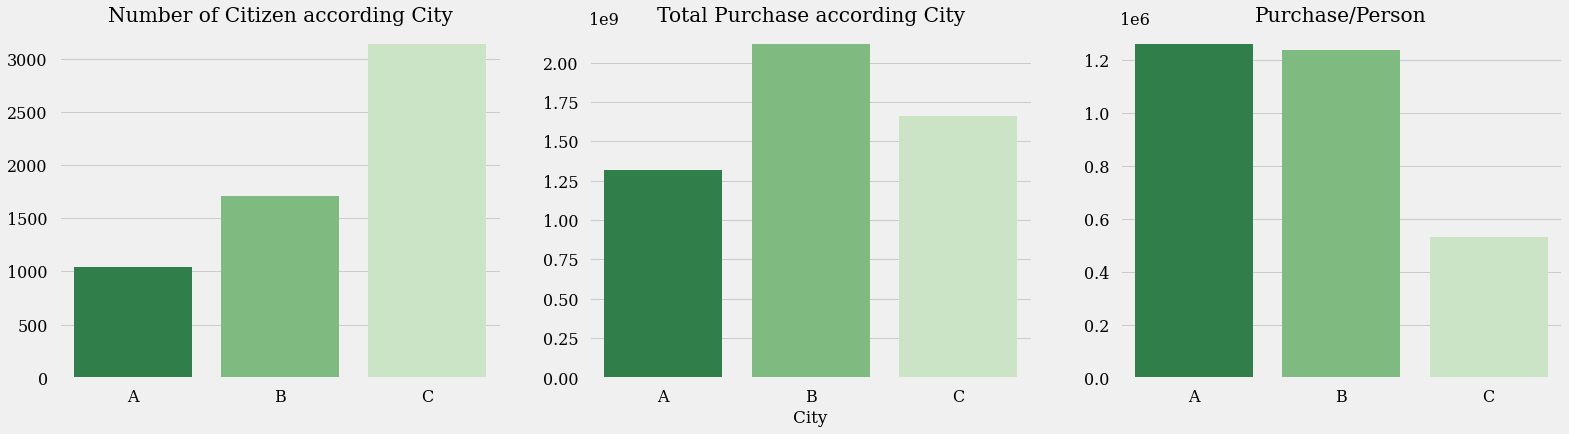

In [18]:
fig, ax = plt.subplots(1,3, figsize = (24,6))
sns.countplot(ax = ax[0], x= 'City_Category', data= user_df, order=["A", "B", "C"], palette='Greens_r')
sns.barplot(ax= ax[1], x = "City_Category", y="Total_Purchase", data= city_purchase, ci=None, palette='Greens_r')
sns.barplot(ax= ax[2], x = "City_Category", y="Ratio Purchase/Person", data= city_purchase, ci=None, palette='Greens_r')
ax[0].set(title="Number of Citizen according City", ylabel = None, xlabel=None)
ax[1].set(title="Total Purchase according City", ylabel = None, xlabel="City")
ax[2].set(title="Purchase/Person", xlabel=None, ylabel=None)

plt.show()

In [19]:
ord_city = list(city_purchase.sort_values(by="Ratio Purchase/Person").City_Category)
print("Increasing order of cities according amount of purchase/person:", ord_city)

Increasing order of cities according amount of purchase/person: ['C', 'B', 'A']


#### Relationship between Age - Purchase amount 

In [20]:
age_purchase = user_df[["Age", "Total_Purchase"]]
age_purchase = age_purchase.groupby("Age", as_index = False).agg({'Total_Purchase': 'sum'})
age_purchase

,Age,Total_Purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


In [21]:
age_purchase["Number customer"] = 0
for age in age_purchase.Age.unique():
    age_purchase.loc[age_purchase.Age == age, "Number customer"] = len(user_df[user_df.Age == age])
age_purchase["Ratio Purchase/Person"] = round(age_purchase.Total_Purchase / age_purchase["Number customer"], 3)
age_purchase

,Age,Total_Purchase,Number customer,Ratio Purchase/Person
0,0-17,134913183,218,618867.812
1,18-25,913848675,1069,854863.120
2,26-35,2031770578,2053,989659.317
3,36-45,1026569884,1167,879665.710
4,46-50,420843403,531,792548.782
5,51-55,367099644,481,763200.923
6,55+,200767375,372,539697.245


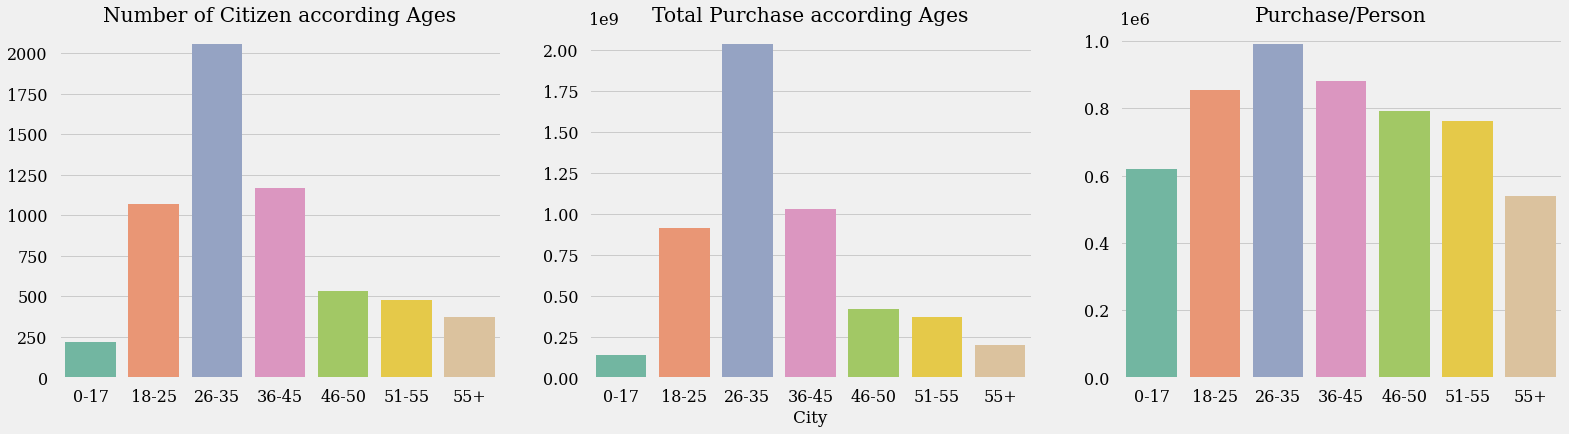

In [22]:
age_order = list(age_purchase.Age.unique())

fig, ax = plt.subplots(1, 3, figsize = (24,6))
sns.countplot(ax = ax[0], x= 'Age', data= user_df, order = age_order, palette='Set2')
sns.barplot(ax= ax[1], x = "Age", y="Total_Purchase", data= age_purchase, ci=None, palette='Set2', order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
sns.barplot(ax= ax[2], x = "Age", y="Ratio Purchase/Person", data= age_purchase, ci=None, palette='Set2', order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])

ax[0].set(title="Number of Citizen according Ages", ylabel = None, xlabel=None)
ax[1].set(title="Total Purchase according Ages", ylabel = None, xlabel="City")
ax[2].set(title="Purchase/Person", xlabel=None, ylabel=None)
plt.show()

In [23]:
# sns.barplot(x = "Age", y = "Ratio Purchase/Person", data= age_purchase)
# plt.title("Amount of money spent by each person on average according their Age.")
# plt.ylabel(None)

# plt.show()
ord_age = list(age_purchase.sort_values(by="Ratio Purchase/Person", ignore_index=True).Age)
print("Increasing order of age range according to amount of Purchase/Person: ", ord_age)

Increasing order of age range according to amount of Purchase/Person:  ['55+', '0-17', '51-55', '46-50', '18-25', '36-45', '26-35']


#### Relationship between Occupation - Purchase amount


In [24]:
job_purchase = user_df[['Occupation', 'Total_Purchase']]
job_purchase = job_purchase.groupby(by='Occupation', as_index = False).agg({'Total_Purchase': 'sum'})
job_purchase.head(6)

,Occupation,Total_Purchase
0,0,635406958
1,1,424614144
2,2,238028583
3,3,162002168
4,4,666244484
5,5,113649759


In [25]:
job_purchase['NumberCustomer'] = 0 
for job in job_purchase.Occupation.unique():
    job_purchase.loc[job_purchase.Occupation == job, 'NumberCustomer'] = len(user_df[user_df.Occupation == job])
job_purchase['Ratio Purchase/Person'] = round(job_purchase.Total_Purchase / job_purchase["NumberCustomer"], 3)
job_purchase.head(6)

,Occupation,Total_Purchase,NumberCustomer,Ratio Purchase/Person
0,0,635406958,688,923556.625
1,1,424614144,517,821303.954
2,2,238028583,256,929799.152
3,3,162002168,170,952953.929
4,4,666244484,740,900330.384
5,5,113649759,111,1023871.703


In [26]:
print(job_purchase.sort_values(by='Ratio Purchase/Person',ignore_index=True))
# job_purchase.Occupation = job_purchase.Occupation - 1
job_purchase
print("\nOrder of Job ID which spent most money (increasing order):")
print(list(job_purchase.sort_values(by='Ratio Purchase/Person').Occupation))

    Occupation  Total_Purchase  NumberCustomer  Ratio Purchase/Person
0           13        71919481             140             513710.579
1           10       115844465             192             603356.589
2            9        54340046              88             617500.523
3           17       393281453             491             800980.556
4           12       305449446             376             812365.548
5            1       424614144             517             821303.954
6            6       188416784             228             826389.404
7            7       557371587             669             833141.386
8           11       106751618             128             833997.016
9           15       118960211             140             849715.793
10           8        14737388              17             866905.176
11          14       259454692             294             882498.952
12           4       666244484             740             900330.384
13          18      

#### Relationship between Gender - Martial Status - Purchase amount  

### 2.3 Product analysis 


In [27]:
product_df = train_df.copy()
product_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [28]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   User_ID             550068 non-null  int64  
 1   Product_ID          550068 non-null  object 
 2   Gender              550068 non-null  object 
 3   Age                 550068 non-null  object 
 4   Occupation          550068 non-null  int64  
 5   City_Category       550068 non-null  object 
 6   Years_in_city       550068 non-null  object 
 7   Marital_Status      550068 non-null  int64  
 8   Product_Category_1  550068 non-null  int64  
 9   Product_Category_2  376430 non-null  float64
 10  Product_Category_3  166821 non-null  float64
 11  Purchase            550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Analysis on sample Product "P00248942"

In [29]:
sample = product_df[product_df.Product_ID == 'P00248942']
sample.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.810000e+02,581.000000,581.000000,581.0,581.0,581.0,581.000000
mean,1.002915e+06,8.013769,0.407917,1.0,6.0,14.0,16304.030981
std,1.800201e+03,6.419782,0.491871,0.0,0.0,0.0,3340.288874
min,1.000001e+06,0.000000,0.000000,1.0,6.0,14.0,3880.000000
25%,1.001347e+06,3.000000,0.000000,1.0,6.0,14.0,15312.000000
50%,1.002898e+06,6.000000,0.000000,1.0,6.0,14.0,15812.000000
75%,1.004514e+06,14.000000,1.000000,1.0,6.0,14.0,19264.000000
max,1.006040e+06,20.000000,1.000000,1.0,6.0,14.0,19701.000000


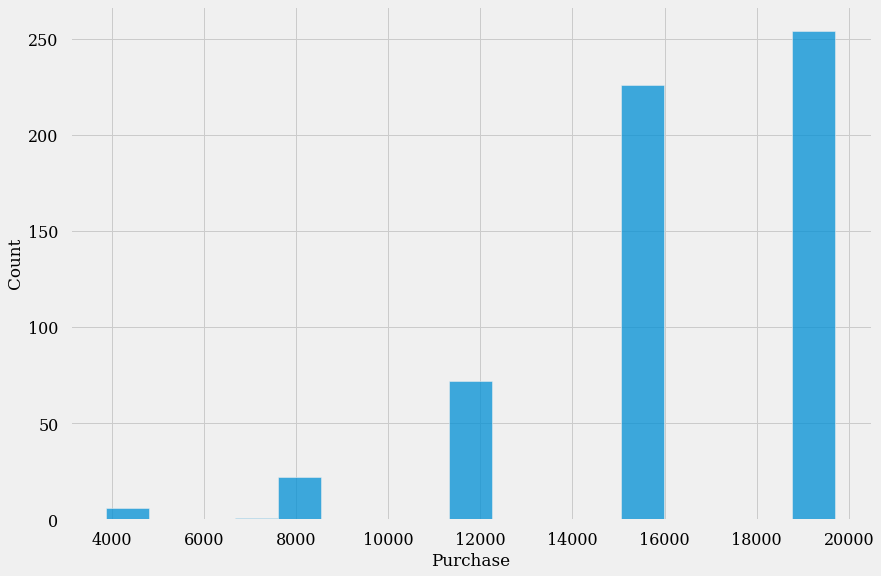

In [30]:
sns.histplot(x="Purchase", data=sample)

In [31]:
sample.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
126,1000024,P00248942,F,26-35,7,A,3,1,1,6.0,14.0,15774
405,1000068,P00248942,M,18-25,4,A,0,0,1,6.0,14.0,11429
516,1000093,P00248942,M,26-35,17,B,1,1,1,6.0,14.0,11754
701,1000135,P00248942,M,18-25,4,C,1,1,1,6.0,14.0,19146


In [32]:
nb = sample[(sample.Purchase < sample.Purchase.quantile(0.25) - 1.5* (sample.Purchase.quantile(0.75) - sample.Purchase.quantile(0.25)))]
print(f"number of product P00248942 which was sold with too low price: {nb.shape[0]}")
print(f"ratio product sold with too low price / product sold: {round(100 * nb.shape[0]/ sample.shape[0], 4)}%")

number of product P00248942 which was sold with too low price: 29
ratio product sold with too low price / product sold: 4.9914%


*Number of people who buy product P00248942 too small* 

**ASSUMPTION: Outliers exists**

#### Eliminate Outliers

**Analysis on Product Category 1**

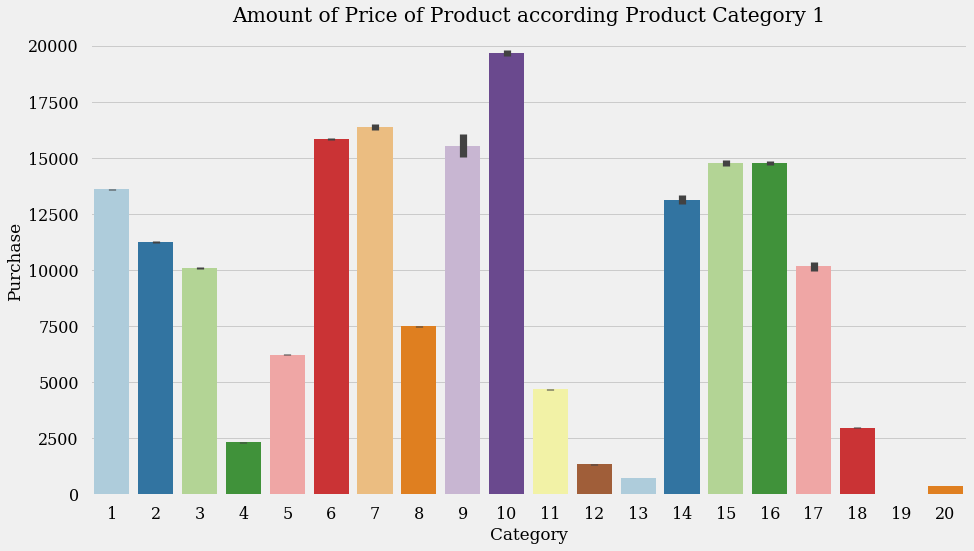

In [33]:
plt.figure(figsize=(14,8))
sns.barplot(data=product_df, x="Product_Category_1", y="Purchase", palette='Paired')
plt.xlabel("Category")
plt.title("Amount of Price of Product according Product Category 1")
plt.show()

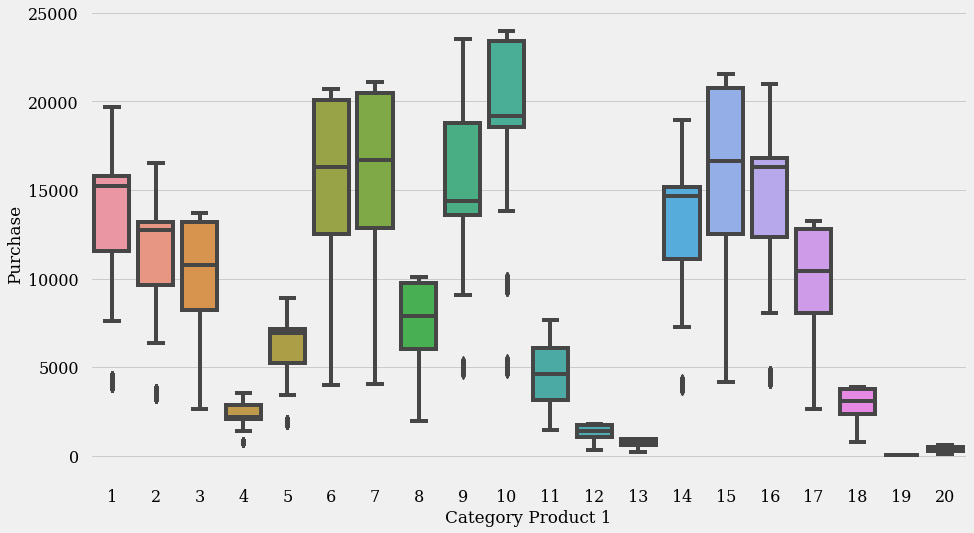

In [34]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Product_Category_1', y="Purchase", data=product_df)
plt.xlabel("Category Product 1")
plt.show()

In [35]:
rm_outlier_product_df = product_df.copy()
cate_1 = sorted(product_df.Product_Category_1.unique())
tot =  0
for i in cate_1:
    p_df = product_df[(product_df.Product_Category_1 == i)]
    print(f"Number of category product {i}:", p_df.shape[0])

    mini = p_df.Purchase.quantile(0.25) - 1.5 * (p_df.Purchase.quantile(0.75) - p_df.Purchase.quantile(0.25))
    maxi = p_df.Purchase.quantile(0.75) + 1.5 * (p_df.Purchase.quantile(0.75) - p_df.Purchase.quantile(0.25))
    p_df = p_df[(p_df.Purchase > maxi) | (p_df.Purchase < mini)]

    tot += p_df.shape[0]
    print(f"Number of category product {i} eliminated", p_df.shape[0])
    
    rm_outlier_product_df = pd.concat([rm_outlier_product_df, p_df]).drop_duplicates(keep=False)

Number of category product 1: 140378
Number of category product 1 eliminated 9018
Number of category product 2: 23864
Number of category product 2 eliminated 1533
Number of category product 3: 20213
Number of category product 3 eliminated 0
Number of category product 4: 11753
Number of category product 4 eliminated 1143
Number of category product 5: 150933
Number of category product 5 eliminated 8757
Number of category product 6: 20466
Number of category product 6 eliminated 0
Number of category product 7: 3721
Number of category product 7 eliminated 0
Number of category product 8: 113925
Number of category product 8 eliminated 0
Number of category product 9: 410
Number of category product 9 eliminated 31
Number of category product 10: 5125
Number of category product 10 eliminated 278
Number of category product 11: 24287
Number of category product 11 eliminated 0
Number of category product 12: 3947
Number of category product 12 eliminated 0
Number of category product 13: 5549
Number of

In [36]:
print(f"Total number of rows in product table: {product_df.shape[0]}")
print(f"Total number of rows have been eliminated: {tot}")
print(f"Percentage of number of rows have been eliminated: {round(100 * tot/product_df.shape[0], 2)}%")

Total number of rows in product table: 550068
Total number of rows have been eliminated: 21336
Percentage of number of rows have been eliminated: 3.88%


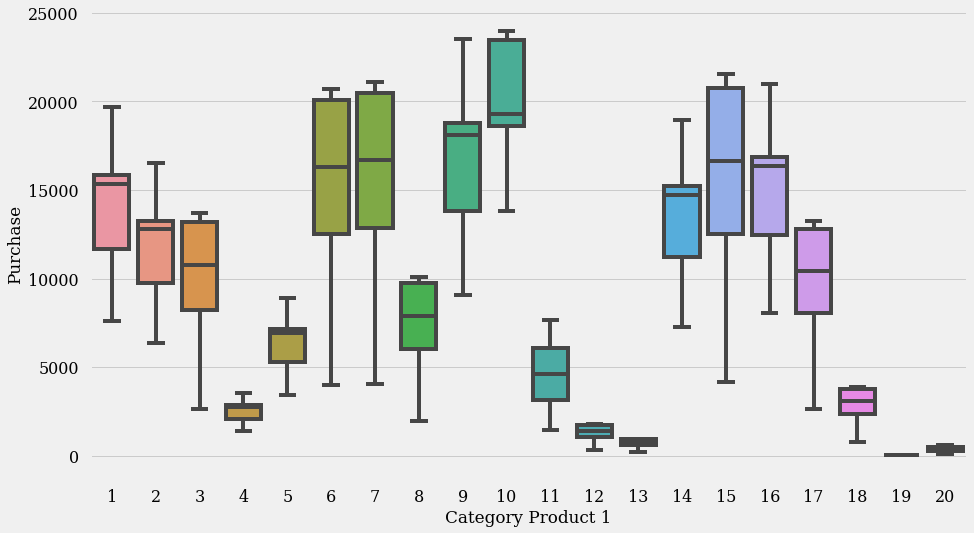

In [37]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Product_Category_1', y="Purchase", data=rm_outlier_product_df)
plt.xlabel("Category Product 1")
plt.show()

In [38]:
def q50(x):
    return x.quantile(0.5)

In [39]:
ord_1_cate_1 = product_df.groupby(by="Product_Category_1").agg({'Purchase':q50}).sort_values(by='Purchase').index
ord_2_cate_1 = product_df.groupby(by="Product_Category_1").agg({'Purchase':'mean'}).sort_values(by='Purchase').index
ord_cate_2 = product_df.groupby(by="Product_Category_2").agg({'Purchase':'mean'}).sort_values(by='Purchase').index 
ord_cate_3 = product_df.groupby(by="Product_Category_3").agg({'Purchase':'mean'}).sort_values(by='Purchase').index
print("ordered list of category according Mode Purchase amount:", list(ord_1_cate_1))
print("ordered list of category according Mean Purchase amount:", list(ord_cate_2))
print("ordered list of category according Mean Purchase amount:", list(ord_cate_3))


ordered list of category according Mode Purchase amount: [19, 20, 13, 12, 4, 18, 11, 5, 8, 17, 3, 2, 9, 14, 1, 16, 6, 15, 7, 10]
ordered list of category according Mean Purchase amount: [7.0, 12.0, 14.0, 9.0, 11.0, 5.0, 18.0, 17.0, 13.0, 4.0, 8.0, 16.0, 15.0, 3.0, 6.0, 2.0, 10.0]
ordered list of category according Mean Purchase amount: [12.0, 4.0, 14.0, 9.0, 18.0, 17.0, 16.0, 11.0, 5.0, 15.0, 8.0, 13.0, 6.0, 10.0, 3.0]


### 2.4 Product ID 

In [40]:
### HANDLE NEW PRODUCT 

def handle_new_product(new_products: list,train_df: pd.DataFrame):
    '''
    new_products: new product which has new Product_ID that have not appeared in train_df dataframe.
    train_df: dataframe which already encodes known Product_ID from categorical datatype to integer (or number).

    '''
    transform_dict = dict()
    df = train_df.copy()

    df = df[~df.Product_ID.isin(new_products)]
    similar = df.copy()
    for product in new_products: 
        c1, c2, c3 = list(df[df.Product_ID == product].iloc[0, [8,9,10]])
        if math.isnan(c1):
            print('Empty information product')
        # if not math.isnan(c1):
        similar = df[df.Product_Category_1 == c1]
        if not math.isnan(c2):
            similar = similar[similar.Prodcut_Category_2 == c2]
        if not math.isnan(c3):
            similar = similar[similar.Prodcut_Category_3 == c3]
        if similar.shape[0] != 0:
            label = math.average(list(similar.Product_ID.unique()))
            transform_dict[product] = round()
    train_df['Product_ID'].replace(transform_dict, inplace=True)

In [41]:
product_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [42]:
ord_pid = product_df.groupby(by="Product_ID").agg({'Purchase':'mean'}).sort_values(by='Purchase').index
print(f"ordered list of Product_ID according amount of Purchase on average: {list(ord_pid)}")

ordered list of Product_ID according amount of Purchase on average: ['P00370293', 'P00370853', 'P00371644', 'P00375436', 'P00372445', 'P00091742', 'P00041442', 'P00293442', 'P00063242', 'P00273842', 'P00203742', 'P00069842', 'P00207842', 'P00132042', 'P00321442', 'P00135542', 'P00066742', 'P00135142', 'P00200742', 'P00025142', 'P00171342', 'P00032642', 'P00212042', 'P00173042', 'P00114242', 'P00102142', 'P00200442', 'P00137142', 'P00238742', 'P00309042', 'P00283142', 'P00227542', 'P00149342', 'P00087142', 'P00202542', 'P00084642', 'P00101542', 'P00089042', 'P00084342', 'P00084442', 'P00112342', 'P00337142', 'P00101642', 'P00336342', 'P00174742', 'P00076542', 'P00101742', 'P00175342', 'P00357742', 'P00087842', 'P00090342', 'P00332842', 'P00273442', 'P00177242', 'P00336542', 'P00331642', 'P00343442', 'P00084042', 'P00276142', 'P00331242', 'P00156542', 'P00236942', 'P0097142', 'P00085842', 'P00272742', 'P00336742', 'P00197242', 'P00176842', 'P00085442', 'P00083942', 'P00036542', 'P0016474

## **3. Modelling**

### Processing 

In [43]:
learn_df = train_df.copy()
learn_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [44]:
learn_df['Efficiency'] = 3 - learn_df.iloc[:,[8, 9, 10]].isnull().sum(axis = 1)
learn_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Efficiency
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,3
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,1


### Simple Linear Regression

#### Simple Linear Regression without analysis on attributes

In [45]:
def lr_processing1(data_frame:pd.DataFrame):
    df = data_frame.copy()

    df.Product_Category_2 = df.Product_Category_2.fillna(0)
    df.Product_Category_3 = df.Product_Category_3.fillna(0)

    le = LabelEncoder()

    df.Gender = le.fit_transform(df.Gender)
    df.City_Category = le.fit_transform(df.City_Category)
    df.Age = le.fit_transform(df.Age)
    df.Years_in_city = le.fit_transform(df.Years_in_city)
    df.Occupation = le.fit_transform(df.Occupation)

    return df

In [46]:
df = lr_processing1(train_df)
X = df.drop(columns = ['User_ID', 'Product_ID', 'Purchase'])
y = df.loc[:, 'Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)
print("Number of rows in train set (attrs): ", X_train.shape[0], "\nNumber of rows in train set (labels): ", y_train.shape[0])

Number of rows in train set (attrs):  412551 
Number of rows in train set (labels):  412551


In [47]:
lr_model = LinearRegression().fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
rmsq_lr = round(math.sqrt(mean_squared_error(y_pred, y_test)),4)
print("Root mean square error on validation set:", rmsq_lr)

Root mean square error on validation set: 4619.5038


#### Simple Linear Regression applying analysis on User attributes

In [48]:
def lr_processing2(data_frame:pd.DataFrame, inplace: bool =False):
    df = data_frame.copy()

    # ASSUMPTION: A Product is more efficient if it is contained in more field (Category here).
    df['Efficiency'] = 3 - df.iloc[:,[8, 9, 10]].isnull().sum(axis = 1)
    
    df.Product_Category_2 = df.Product_Category_2.fillna(0)
    df.Product_Category_3 = df.Product_Category_3.fillna(0)
    
    le = LabelEncoder()
    ss = StandardScaler()

    df.Gender = le.fit_transform(df.Gender)
    df.City_Category = le.fit(['C', 'B', 'A']).transform(df.City_Category)
    df.Age = le.fit(['55+', '0-17', '51-55', '46-50', '18-25', '36-45', '26-35']).transform(df.Age)
    df.Years_in_city = le.fit(['0', '1', '2', '3', '4+']).transform(df.Years_in_city)
    df.Occupation = le.fit([13, 10, 9, 17, 12, 1, 6, 7, 11, 15, 8, 14, 4, 18, 0, 2, 3, 16, 5, 19, 20]).transform(df.Occupation)

    return df 

In [49]:
df = lr_processing2(train_df)
X = df.drop(columns = ['User_ID', 'Product_ID', 'Purchase'])
y = df.loc[:, 'Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)
print("Number of rows in train set (attrs): ", X_train.shape[0], "\nNumber of rows in train set (labels): ", y_train.shape[0])

Number of rows in train set (attrs):  412551 
Number of rows in train set (labels):  412551


In [50]:
lin_model = LinearRegression().fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
lin_rmse = round(math.sqrt(mean_squared_error(y_pred, y_test)),4)
print("Root mean square error on validation set:", lin_rmse)

Root mean square error on validation set: 4603.9093


In [51]:
print("APPLYING ANALYSIS ON USER ATTRIBUTES GIVES decrease:",  round(100*(rmsq_lr - lin_rmse)/rmsq_lr, 4), "%")

APPLYING ANALYSIS ON USER ATTRIBUTES GIVES decrease: 0.3376 %


**=> User Attributes are useless. So, we need analize more on Product Attributes**

#### Simple Linear Regression applying analysis on Product attributes

In [52]:
# test 
def lr_processing3(data_frame:pd.DataFrame, inplace: bool =False):
    df = data_frame.copy()
    df['Efficiency'] = 3 - df.iloc[:,[8, 9, 10]].isnull().sum(axis = 1)
    
    le = LabelEncoder()
    ss = StandardScaler()
    
    
    df.Product_Category_2 = df.Product_Category_2.fillna(0)
    df.Product_Category_3 = df.Product_Category_3.fillna(0)
    
    df.Product_Category_1 = le.fit([19, 20, 13, 12, 4, 18, 11, 5, 8, 17, 3, 2, 9, 14, 1, 16, 6, 15, 7, 10]).transform(df.Product_Category_1)
    df.Product_Category_2 = le.fit([0 ,7.0, 12.0, 14.0, 9.0, 11.0, 5.0, 18.0, 17.0, 13.0, 4.0, 8.0, 16.0, 15.0, 3.0, 6.0, 2.0, 10.0]).transform(df.Product_Category_2)
    df.Product_Category_3 = le.fit([0, 12.0, 4.0, 14.0, 9.0, 18.0, 17.0, 16.0, 11.0, 5.0, 15.0, 8.0, 13.0, 6.0, 10.0, 3.0]).transform(df.Product_Category_3)
    df.Product_ID = le.fit(list(ord_pid)).transform(df.Product_ID)

    df.Gender = le.fit_transform(df.Gender)
    df.City_Category = le.fit(['C', 'B', 'A']).transform(df.City_Category)
    df.Age = le.fit(['55+', '0-17', '51-55', '46-50', '18-25', '36-45', '26-35']).transform(df.Age)
    df.Years_in_city = le.fit(['0', '1', '2', '3', '4+']).transform(df.Years_in_city)
    df.Occupation = le.fit([13, 10, 9, 17, 12, 1, 6, 7, 11, 15, 8, 14, 4, 18, 0, 2, 3, 16, 5, 19, 20]).transform(df.Occupation)

    return df

In [53]:
df = lr_processing3(product_df)
X = df.drop(columns = ['User_ID', 'Purchase'])
y = df.loc[:, 'Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)
print("Number of rows in train set (attrs): ", X_train.shape[0], "\nNumber of rows in train set (labels): ", y_train.shape[0])

Number of rows in train set (attrs):  412551 
Number of rows in train set (labels):  412551


In [54]:
lin_model = LinearRegression().fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
lin_rmse = round(math.sqrt(mean_squared_error(y_pred, y_test)),4)
print("Root mean square error on validation set:", lin_rmse)

Root mean square error on validation set: 4593.6957


#### Unused

In [55]:
# df_copy = df.copy()
# age_label = le.fit(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
# df_copy.Age = age_label.transform(df_copy.Age)

In [56]:
# df_copy.Gender = le.fit_transform(df_copy.Gender)
# city_label = le.fit(['C', 'B', 'A'])
# df_copy.City_Category = city_label.transform(df_copy.City_Category)
# year_label = le.fit(['0', '1', '2', '3', '4+'])
# df_copy.Years_in_city = year_label.transform(df_copy.Years_in_city)

In [57]:
# df_copy.head()

In [58]:
# df_copy.info()

In [59]:
# df_copy = df_copy.sort_values(by=['Product_Category_1', 'Product_Category_2', 'Product_Category_3'], ascending=[False, False, False])
# display(df_copy.head(4))

In [60]:
# df_copy.Product_ID = le.fit_transform(df_copy.Product_ID)
# df_copy.head(4)

In [61]:
# num_product = df.Product_ID.unique()
# print("number of products:", len(num_product))

In [62]:
# print("maximum items that was bought by 1 user:", max(a2), 
#       "\nminimum items that was bought by 1 user:", min(a2))

### Polynomial Regression


In [63]:
df = lr_processing3(product_df)
X = df.drop(columns = ['User_ID', 'Purchase'])
y = df.loc[:, 'Purchase']

In [72]:
# Polynomial Regression degree = 2

poly = PolynomialFeatures(degree = 2) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

trans_ = LinearRegression().fit(poly_X_train, y_train)
y_pred = trans_.predict(poly_X_test)
print("rmse in train set: ", math.sqrt(mean_squared_error(trans_.predict(poly_X_train), y_train)))
print("rmse in validation set: ", math.sqrt(mean_squared_error(y_pred, y_test)))

rmse in train set:  4321.86094175912
rmse in validation set:  4315.937288457915


In [70]:
poly = PolynomialFeatures(degree = 4) # cannot test degree = 4 (GG Colab crashes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

In [71]:
trans_ = LinearRegression().fit(poly_X_train, y_train)
y_pred = trans_.predict(poly_X_test)
print("rmse in train set: ", math.sqrt(mean_squared_error(trans_.predict(poly_X_train), y_train)))
print("rmse in validation set: ", math.sqrt(mean_squared_error(y_pred, y_test)))

rmse in train set:  3896.257982394621
rmse in validation set:  3905.280289552176


## **THE END, BELOW = DRAFT**

**Unused**

In [73]:
top_user = list(user_df.sort_values(by="Total_Purchase", ignore_index=False, ascending=True).User_ID.unique())
print(top_user[:10])

[1004464, 1000094, 1003883, 1005117, 1004991, 1005944, 1002111, 1003291, 1003275, 1004636]


In [ ]:
# sample2_customer = sample2.loc[(sample2.Purchase > 6000) & (sample2.Purchase <7500)]
'''
    Mua sản phẩm với giá thấp
'''
sample2_customer = sample2.loc[(sample2.Purchase < 9000)]
print(list(sample2_customer.Age.unique()))
sns.countplot(x='Age', data=sample2_customer, hue='Gender', order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.show()

In [ ]:
# sample2_customer = sample2.loc[(sample2.Purchase < 5000)]
"""
    Mua sản phẩm với giá cao
"""
sns.countplot(x='Age', data=sample2.loc[(sample2.Purchase > 9000)], hue='Gender', order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.show()

In [ ]:
sample = product_df.groupby(by = ['Product_ID', 'User_ID']).agg({'Purchase':'mean'}).sort_values(by=['Product_ID', 'User_ID'])
sample2 = product_df.sort_values(by=['User_ID', 'Product_ID'])
# sample2.
sample2[sample2.Product_ID == 'P00000142']
sample3 = product_df.groupby(by = 'User_ID').agg({'Purchase':'mean'})

In [ ]:
product_df[product_df.Product_ID.isin(['P00000142'])]

In [ ]:
train_product = product_df.iloc[:, 0]
u_train_product = train_product.unique()
print("number of distinct products in train data:", len(u_train_product))
print("number of duplicated products in train data:", product_df[product_df.duplicated()].shape[0])

In [ ]:
# test_product = test_df.iloc[:, 1]
# u_test_product = test_product.unique()
# print("number of distinct products in test data:", len(u_test_product))
# print("number of duplicated product in test data:", test_product[test_product.duplicated()].shape[0])

In [ ]:
# in_train_but_test = np.isin(u_train_product,u_test_product, invert=True)
# print("number of products in train data but not in test data:", len(u_train_product[in_train_but_test]))
# in_test_but_train = np.isin(u_test_product, u_train_product, invert=True)
# print("number of products in test data but not in train data:", len(u_test_product[in_test_but_train]))

In [ ]:
# print(sorted(u_test_product[in_test_but_train])[0:2])
# print("product P00012642 in train data:")
# (product_df[product_df.Product_ID == 'P00012642'])

In [ ]:
# new_products = test_df.loc[test_df.Product_ID.isin(list(u_test_product[in_test_but_train]))]
# new_products.head()

In [ ]:
sns.boxplot(x='Product_Category_2', y="Purchase", data=product_df)
plt.xlabel("Product Category 2")
plt.show()

**Submit .csv file**

In [ ]:

# test = processing_(test_df)
# X_test = test.drop(columns = ['User_ID', 'Product_ID'])
# y_test_pred = lin_model.predict(X_test)

In [ ]:
# Output, need change name
submit_df = pd.DataFrame()
submit_df["Purchase"] = y_test_pred
submit_df["User_ID"] = test_df.loc[:, "User_ID"]
submit_df['Product_ID'] = test_df.loc[:, "Product_ID"]
submit_df.to_csv(path_or_buf= 'output.csv', index = False)